In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures,StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV,learning_curve, validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.metrics import precision_recall_curve,confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, auc,plot_roc_curve, roc_curve
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg
from sklearn.metrics import SCORERS,accuracy_score, plot_precision_recall_curve,mean_squared_error
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')



In [3]:
bank = pd.read_csv('BankChurners.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df = bank.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
               axis=1,).copy()

In [ ]:
select avg(Customer_Age)
from BankChurners
where marital_status == 'Married'
groupby attrition_flag

## Data Cleansing

In [5]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.isna().sum()/len(df)*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

<AxesSubplot:>

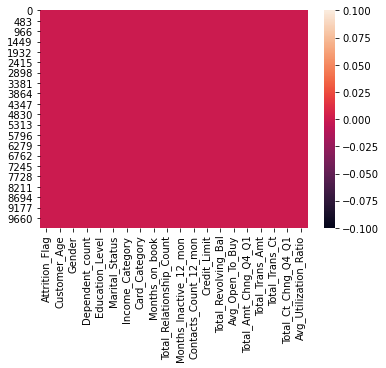

In [8]:
sns.heatmap(df.isna())

<h3> Tidak terdapat data null di dalam dataset sehingga ridak di perlukannya imputationpada dataset 

## Check outliers

In [9]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

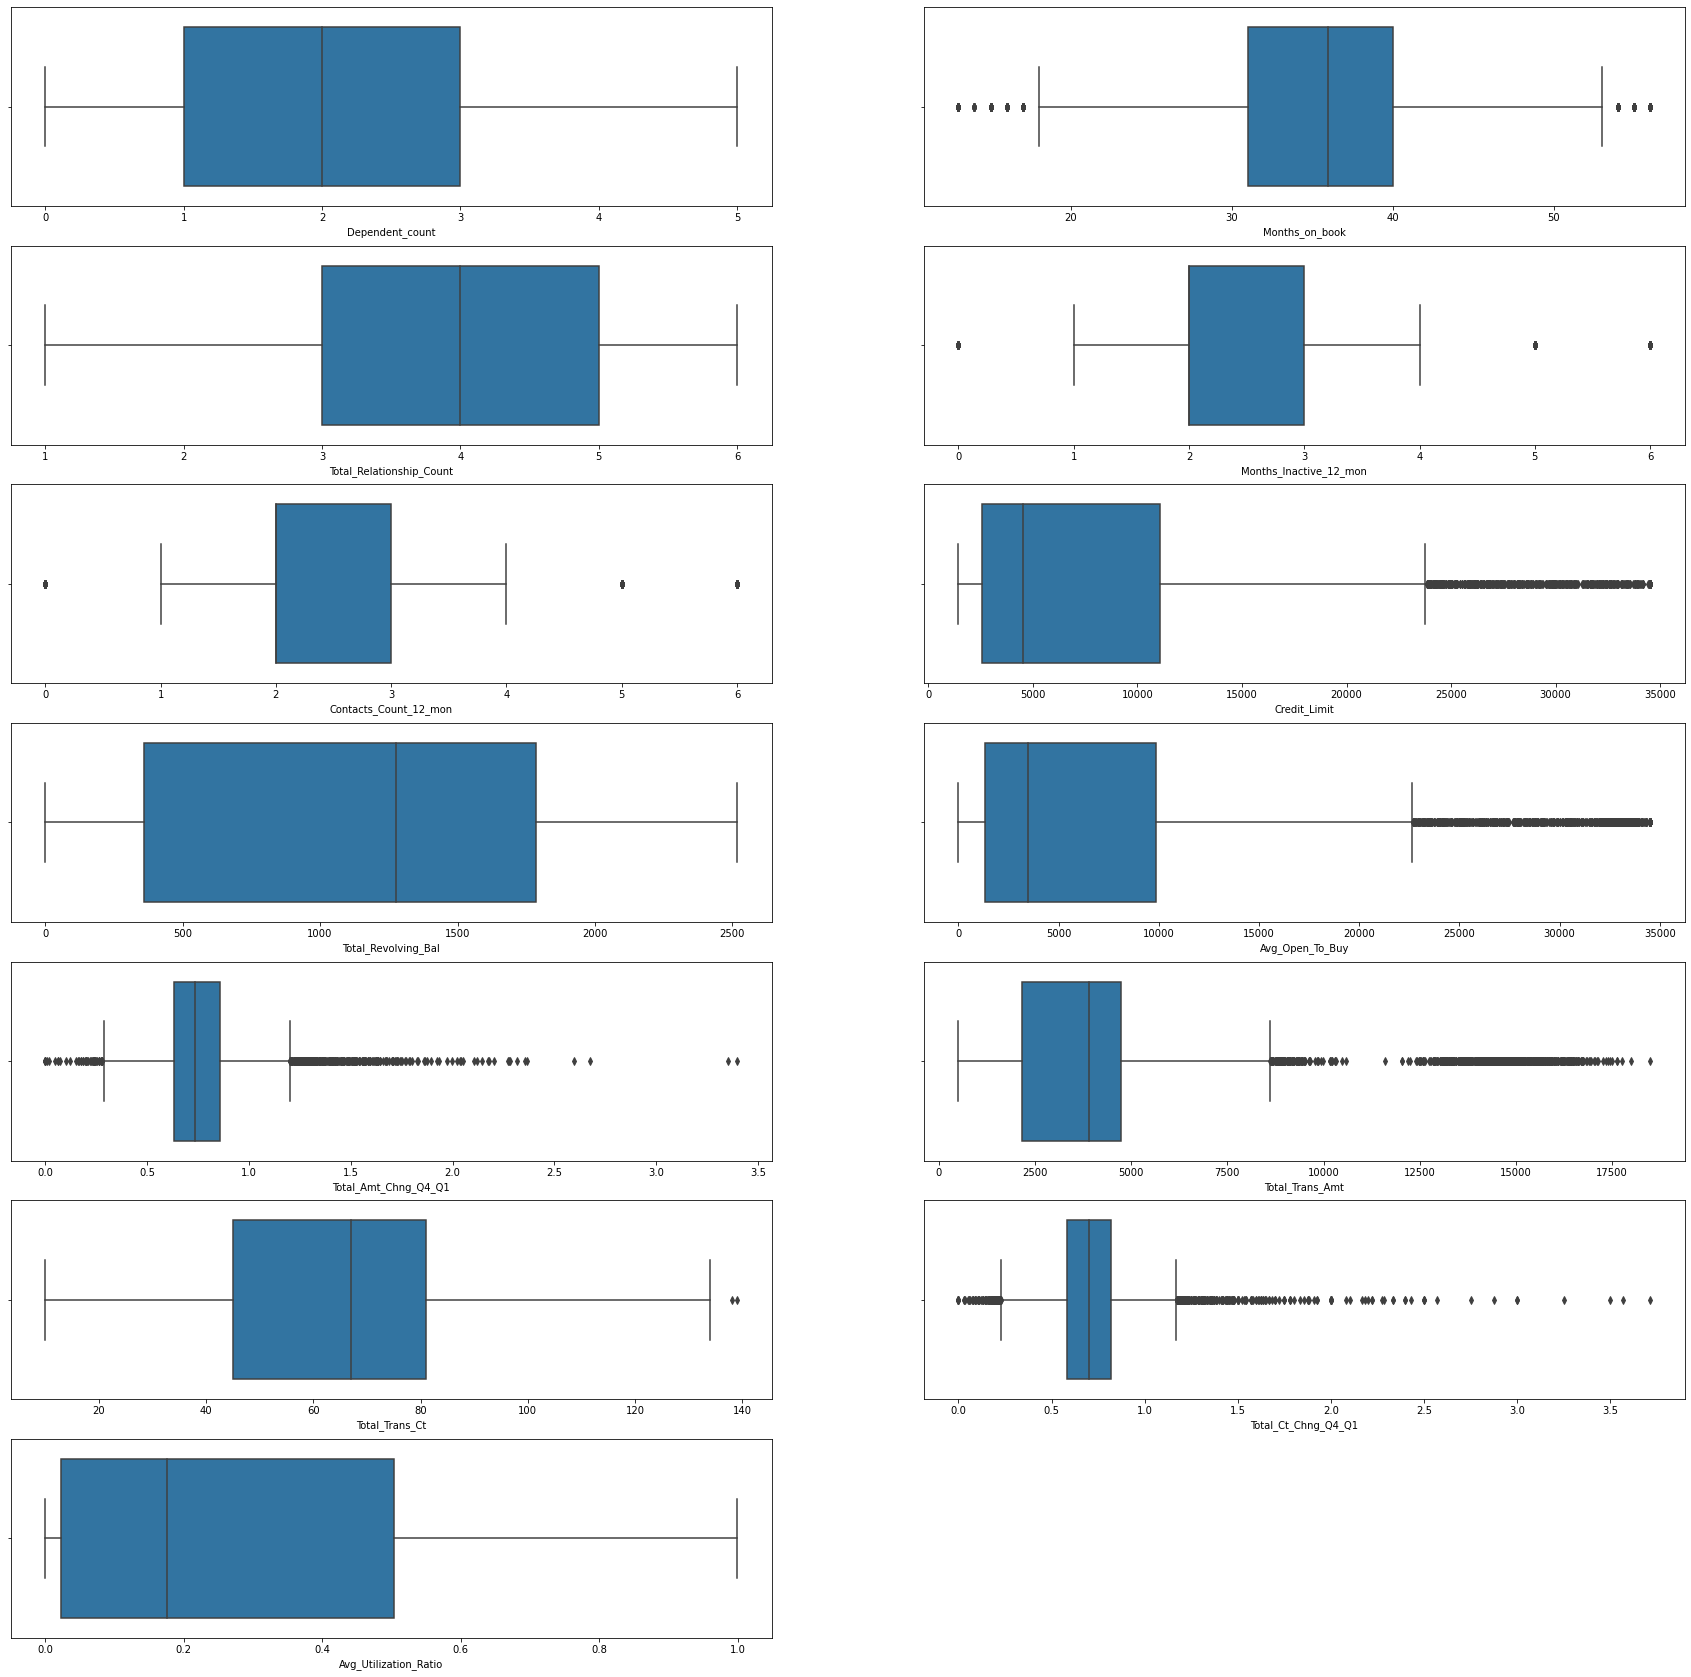

In [10]:
plt.figure(figsize=(30,30))
plt.subplot(721)
sns.boxplot(df['Dependent_count'])
plt.subplot(722)
sns.boxplot(df['Months_on_book'])
plt.subplot(723)
sns.boxplot(df['Total_Relationship_Count'])
plt.subplot(724)
sns.boxplot(df['Months_Inactive_12_mon'])
plt.subplot(725)
sns.boxplot(df['Contacts_Count_12_mon'])
plt.subplot(726)
sns.boxplot(df['Credit_Limit'])
plt.subplot(727)
sns.boxplot(df['Total_Revolving_Bal'])
plt.subplot(728)
sns.boxplot(df['Avg_Open_To_Buy'])
plt.subplot(729)
sns.boxplot(df['Total_Amt_Chng_Q4_Q1'])
plt.subplot(7,2,10)
sns.boxplot(df['Total_Trans_Amt'])
plt.subplot(7,2,11)
sns.boxplot(df['Total_Trans_Ct'])
plt.subplot(7,2,12)
sns.boxplot(df['Total_Ct_Chng_Q4_Q1'])
plt.subplot(7,2,13)
sns.boxplot(df['Avg_Utilization_Ratio'])
plt.show()

Dari Boxplot di atas terdapat beberapa kolom yang memiliki outlier yang cukup banyak:
- Total_trans_Amt
- Total_Ct_Change_Q4_Q3
- Total_Ct_Change_Q4_Q1
- Avg_open_to_buy
- Credit_Limit
- Months_on_Book


In [11]:
# ceknilai outlier
# data outlier using iqr
def iqr(cols):
    col = cols.split(' ')
    name = []
    tmp = []
    for i in col:
        s = df[i]
        a = pd.DataFrame(s)
        Q1 = a.describe()[i]['25%']
        Q3 = a.describe()[i]['75%']
        IQR = Q3 - Q1 
        UF = Q3 + (1.5 * IQR)
        LF= Q1 - (1.5 * IQR)

        b = a[(a[i] < LF) | (a[i] > UF) ]
        a = a[a[i] < LF]
        c = a[a[i] > UF]
        e =str(round((len(b)/len(df)*100),2)) + '%'
        
        tmp.append(e)
        name.append(i)
    res = pd.DataFrame({'name':name, 'percentile':tmp})
        
    return res
iqr('Months_on_book Credit_Limit Total_Amt_Chng_Q4_Q1 Total_Ct_Chng_Q4_Q1 Total_Trans_Amt Months_Inactive_12_mon Contacts_Count_12_mon')

,name,percentile
0,Months_on_book,3.81%
1,Credit_Limit,9.72%
2,Total_Amt_Chng_Q4_Q1,3.9%
3,Total_Ct_Chng_Q4_Q1,3.91%
4,Total_Trans_Amt,8.85%
5,Months_Inactive_12_mon,3.27%
6,Contacts_Count_12_mon,6.21%


<h3> akan membuat kolom baru dimana dapat menandakan apakah rowtersebut termasuk outliers atau tidak

In [12]:
col = 'Months_on_book Credit_Limit Total_Amt_Chng_Q4_Q1 Total_Ct_Chng_Q4_Q1 Total_Trans_Amt Months_Inactive_12_mon Contacts_Count_12_mon'.split()

for i in col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1


    conditions  = [ (df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)),
                   (df[i] > (Q1 - 1.5 * IQR)) |(df[i] < (Q3 + 1.5 * IQR)) ]
    choices     = [ 1,0 ]
    # 1 outlier
    # 0 tidak

    df[i+'_ol_lab'] = np.select(conditions, choices)


In [13]:
df[['Months_on_book_ol_lab', 'Credit_Limit_ol_lab',
       'Total_Amt_Chng_Q4_Q1_ol_lab', 'Total_Ct_Chng_Q4_Q1_ol_lab',
       'Total_Trans_Amt_ol_lab', 'Months_Inactive_12_mon_ol_lab',
       'Contacts_Count_12_mon_ol_lab']]

,Months_on_book_ol_lab,Credit_Limit_ol_lab,Total_Amt_Chng_Q4_Q1_ol_lab,Total_Ct_Chng_Q4_Q1_ol_lab,Total_Trans_Amt_ol_lab,Months_Inactive_12_mon_ol_lab,Contacts_Count_12_mon_ol_lab
0,0,0,1,1,0,0,0
1,0,0,1,1,0,0,0
2,0,0,1,1,0,0,1
3,0,0,1,1,0,0,0
4,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...
10122,0,0,0,0,1,0,0
10123,0,0,0,0,1,0,0
10124,0,0,0,0,1,0,0
10125,0,0,0,0,0,0,0


In [ ]:
# pottt

## Data Splitting

In [14]:
x = df.drop('Attrition_Flag',axis=1)
y= np.where(df['Attrition_Flag']=='Attrited Customer',1,0)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=.2,random_state=2020)

In [16]:
def summary(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [17]:
summary(df)

,Column,d_type,unique_sample,n_uniques
0,Attrition_Flag,object,"[Existing Customer, Attrited Customer]",2
1,Customer_Age,int64,"[45, 49, 51, 40, 44]",45
2,Gender,object,"[M, F]",2
3,Dependent_count,int64,"[3, 5, 4, 2, 0]",6
4,Education_Level,object,"[High School, Graduate, Uneducated, Unknown, C...",7
5,Marital_Status,object,"[Married, Single, Unknown, Divorced]",4
6,Income_Category,object,"[$60K - $80K, Less than $40K, $80K - $120K, $4...",6
7,Card_Category,object,"[Blue, Gold, Silver, Platinum]",4
8,Months_on_book,int64,"[39, 44, 36, 34, 21]",44
9,Total_Relationship_Count,int64,"[5, 6, 4, 3, 2]",6


## Cek distribution for scaling

melihat apakah distribusi data berubah atau tidak setelah di lakukan scaling pada dataset

In [18]:
## column yang mempunyai Outliers
df_out = df[[ 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Months_on_book_ol_lab', 'Credit_Limit_ol_lab',
       'Total_Amt_Chng_Q4_Q1_ol_lab', 'Total_Ct_Chng_Q4_Q1_ol_lab',
       'Total_Trans_Amt_ol_lab', 'Months_Inactive_12_mon_ol_lab',
       'Contacts_Count_12_mon_ol_lab']]
cols = df_out.columns
cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Months_on_book_ol_lab', 'Credit_Limit_ol_lab',
       'Total_Amt_Chng_Q4_Q1_ol_lab', 'Total_Ct_Chng_Q4_Q1_ol_lab',
       'Total_Trans_Amt_ol_lab', 'Months_Inactive_12_mon_ol_lab',
       'Contacts_Count_12_mon_ol_lab'],
      dtype='object')

In [19]:
standar = StandardScaler()
x_standard = standar.fit_transform(df_out)
x_standard = pd.DataFrame(x_standard, columns=cols)
x_standard

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_on_book_ol_lab,Credit_Limit_ol_lab,Total_Amt_Chng_Q4_Q1_ol_lab,Total_Ct_Chng_Q4_Q1_ol_lab,Total_Trans_Amt_ol_lab,Months_Inactive_12_mon_ol_lab,Contacts_Count_12_mon_ol_lab
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,-0.973895,3.834003,-0.775882,-0.199064,-0.32806,4.963665,4.957140,-0.311551,-0.183819,-0.257341
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,-1.357340,12.608573,-0.616276,-0.199064,-0.32806,4.963665,4.957140,-0.311551,-0.183819,-0.257341
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,-1.911206,6.807864,-0.997155,-0.199064,-0.32806,4.963665,4.957140,-0.311551,-0.183819,3.885892
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,-1.911206,6.807864,1.759686,-0.199064,-0.32806,4.963665,4.957140,-0.311551,-0.183819,-0.257341
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,-1.570365,7.509325,-0.997155,-0.199064,-0.32806,4.963665,4.957140,-0.311551,-0.183819,3.885892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,...,2.221481,0.608119,0.678714,-0.199064,-0.32806,-0.201464,-0.201729,3.209744,-0.183819,-0.257341
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,...,0.176440,-0.122745,0.856458,-0.199064,-0.32806,-0.201464,-0.201729,3.209744,-0.183819,-0.257341
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,...,-0.207005,0.444305,-0.997155,-0.199064,-0.32806,-0.201464,-0.201729,3.209744,-0.183819,-0.257341
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,...,-0.121795,0.041070,-0.997155,-0.199064,-0.32806,-0.201464,-0.201729,-0.311551,-0.183819,-0.257341


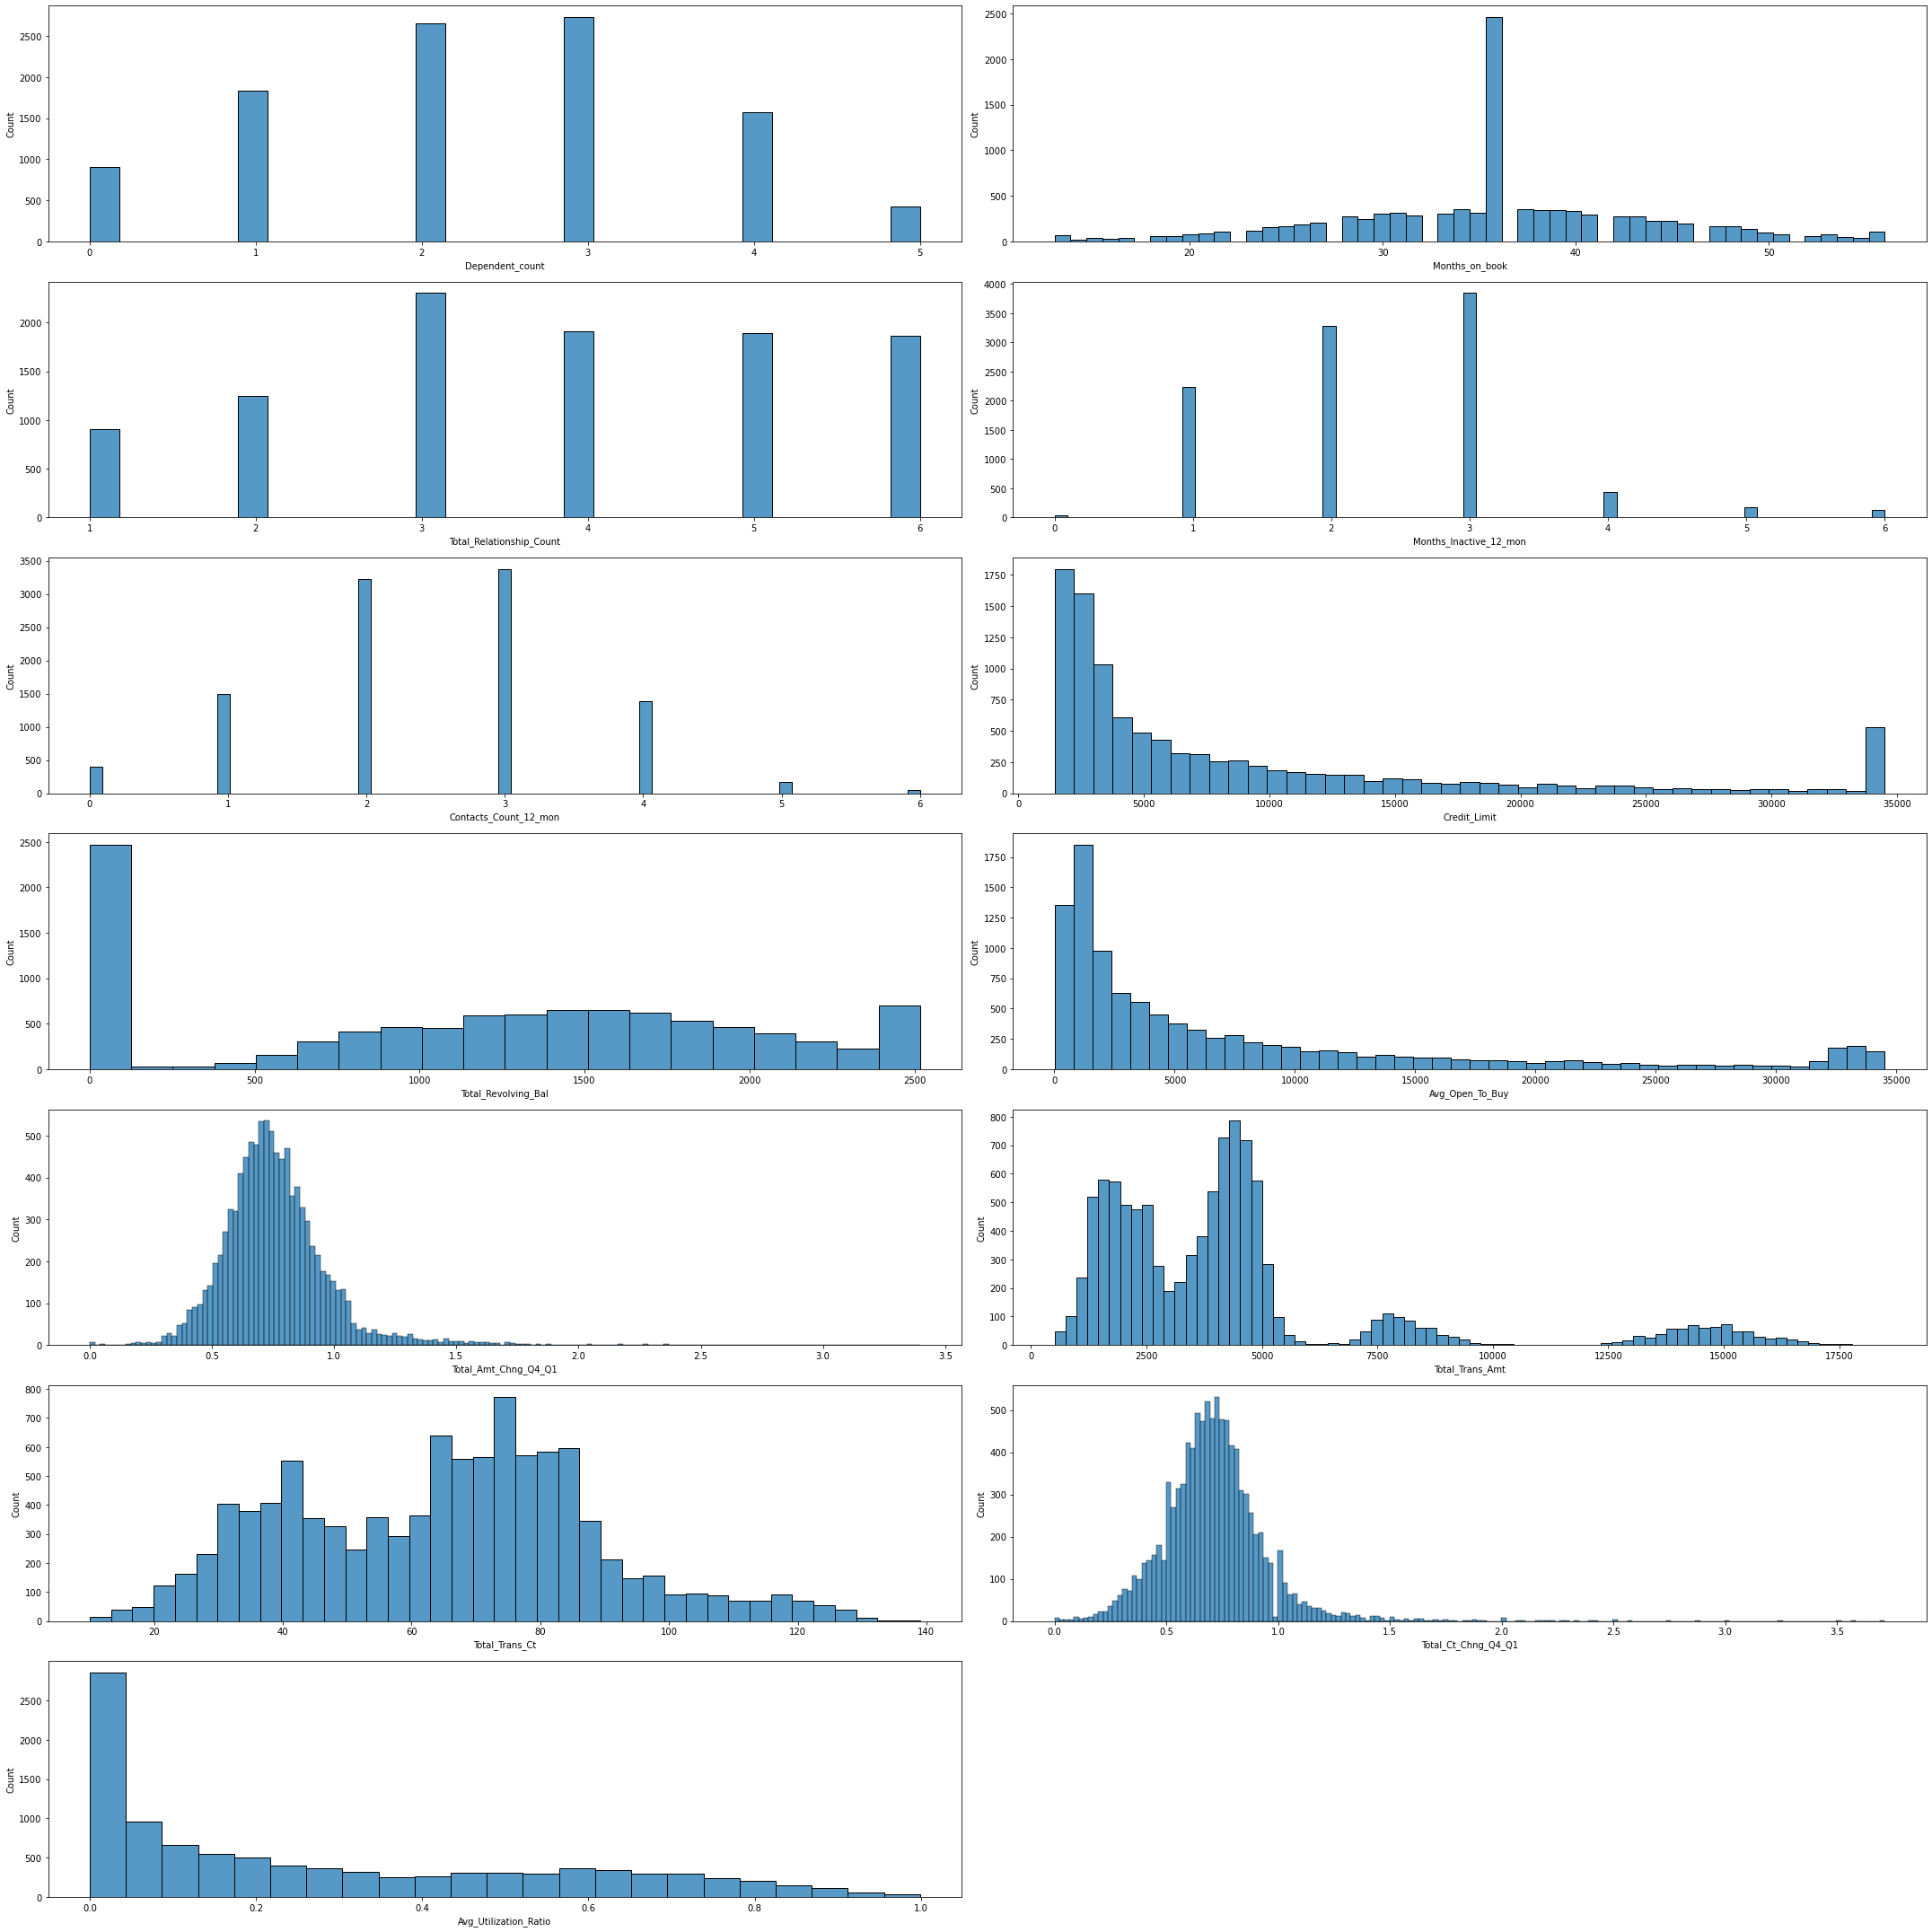

In [20]:
plt.figure(figsize=(30,30))
plt.subplot(721)
sns.histplot(df['Dependent_count'])
plt.subplot(722)
sns.histplot(df['Months_on_book'])
plt.subplot(723)
sns.histplot(df['Total_Relationship_Count'])
plt.subplot(724)
sns.histplot(df['Months_Inactive_12_mon'])
plt.subplot(725)
sns.histplot(df['Contacts_Count_12_mon'])
plt.subplot(726)
sns.histplot(df['Credit_Limit'])
plt.subplot(727)
sns.histplot(df['Total_Revolving_Bal'])
plt.subplot(728)
sns.histplot(df['Avg_Open_To_Buy'])
plt.subplot(729)
sns.histplot(df['Total_Amt_Chng_Q4_Q1'])
plt.subplot(7,2,10)
sns.histplot(df['Total_Trans_Amt'])
plt.subplot(7,2,11)
sns.histplot(df['Total_Trans_Ct'])
plt.subplot(7,2,12)
sns.histplot(df['Total_Ct_Chng_Q4_Q1'])
plt.subplot(7,2,13)
sns.histplot(df['Avg_Utilization_Ratio'])
# ----------------------------------------

plt.tight_layout()
plt.show()

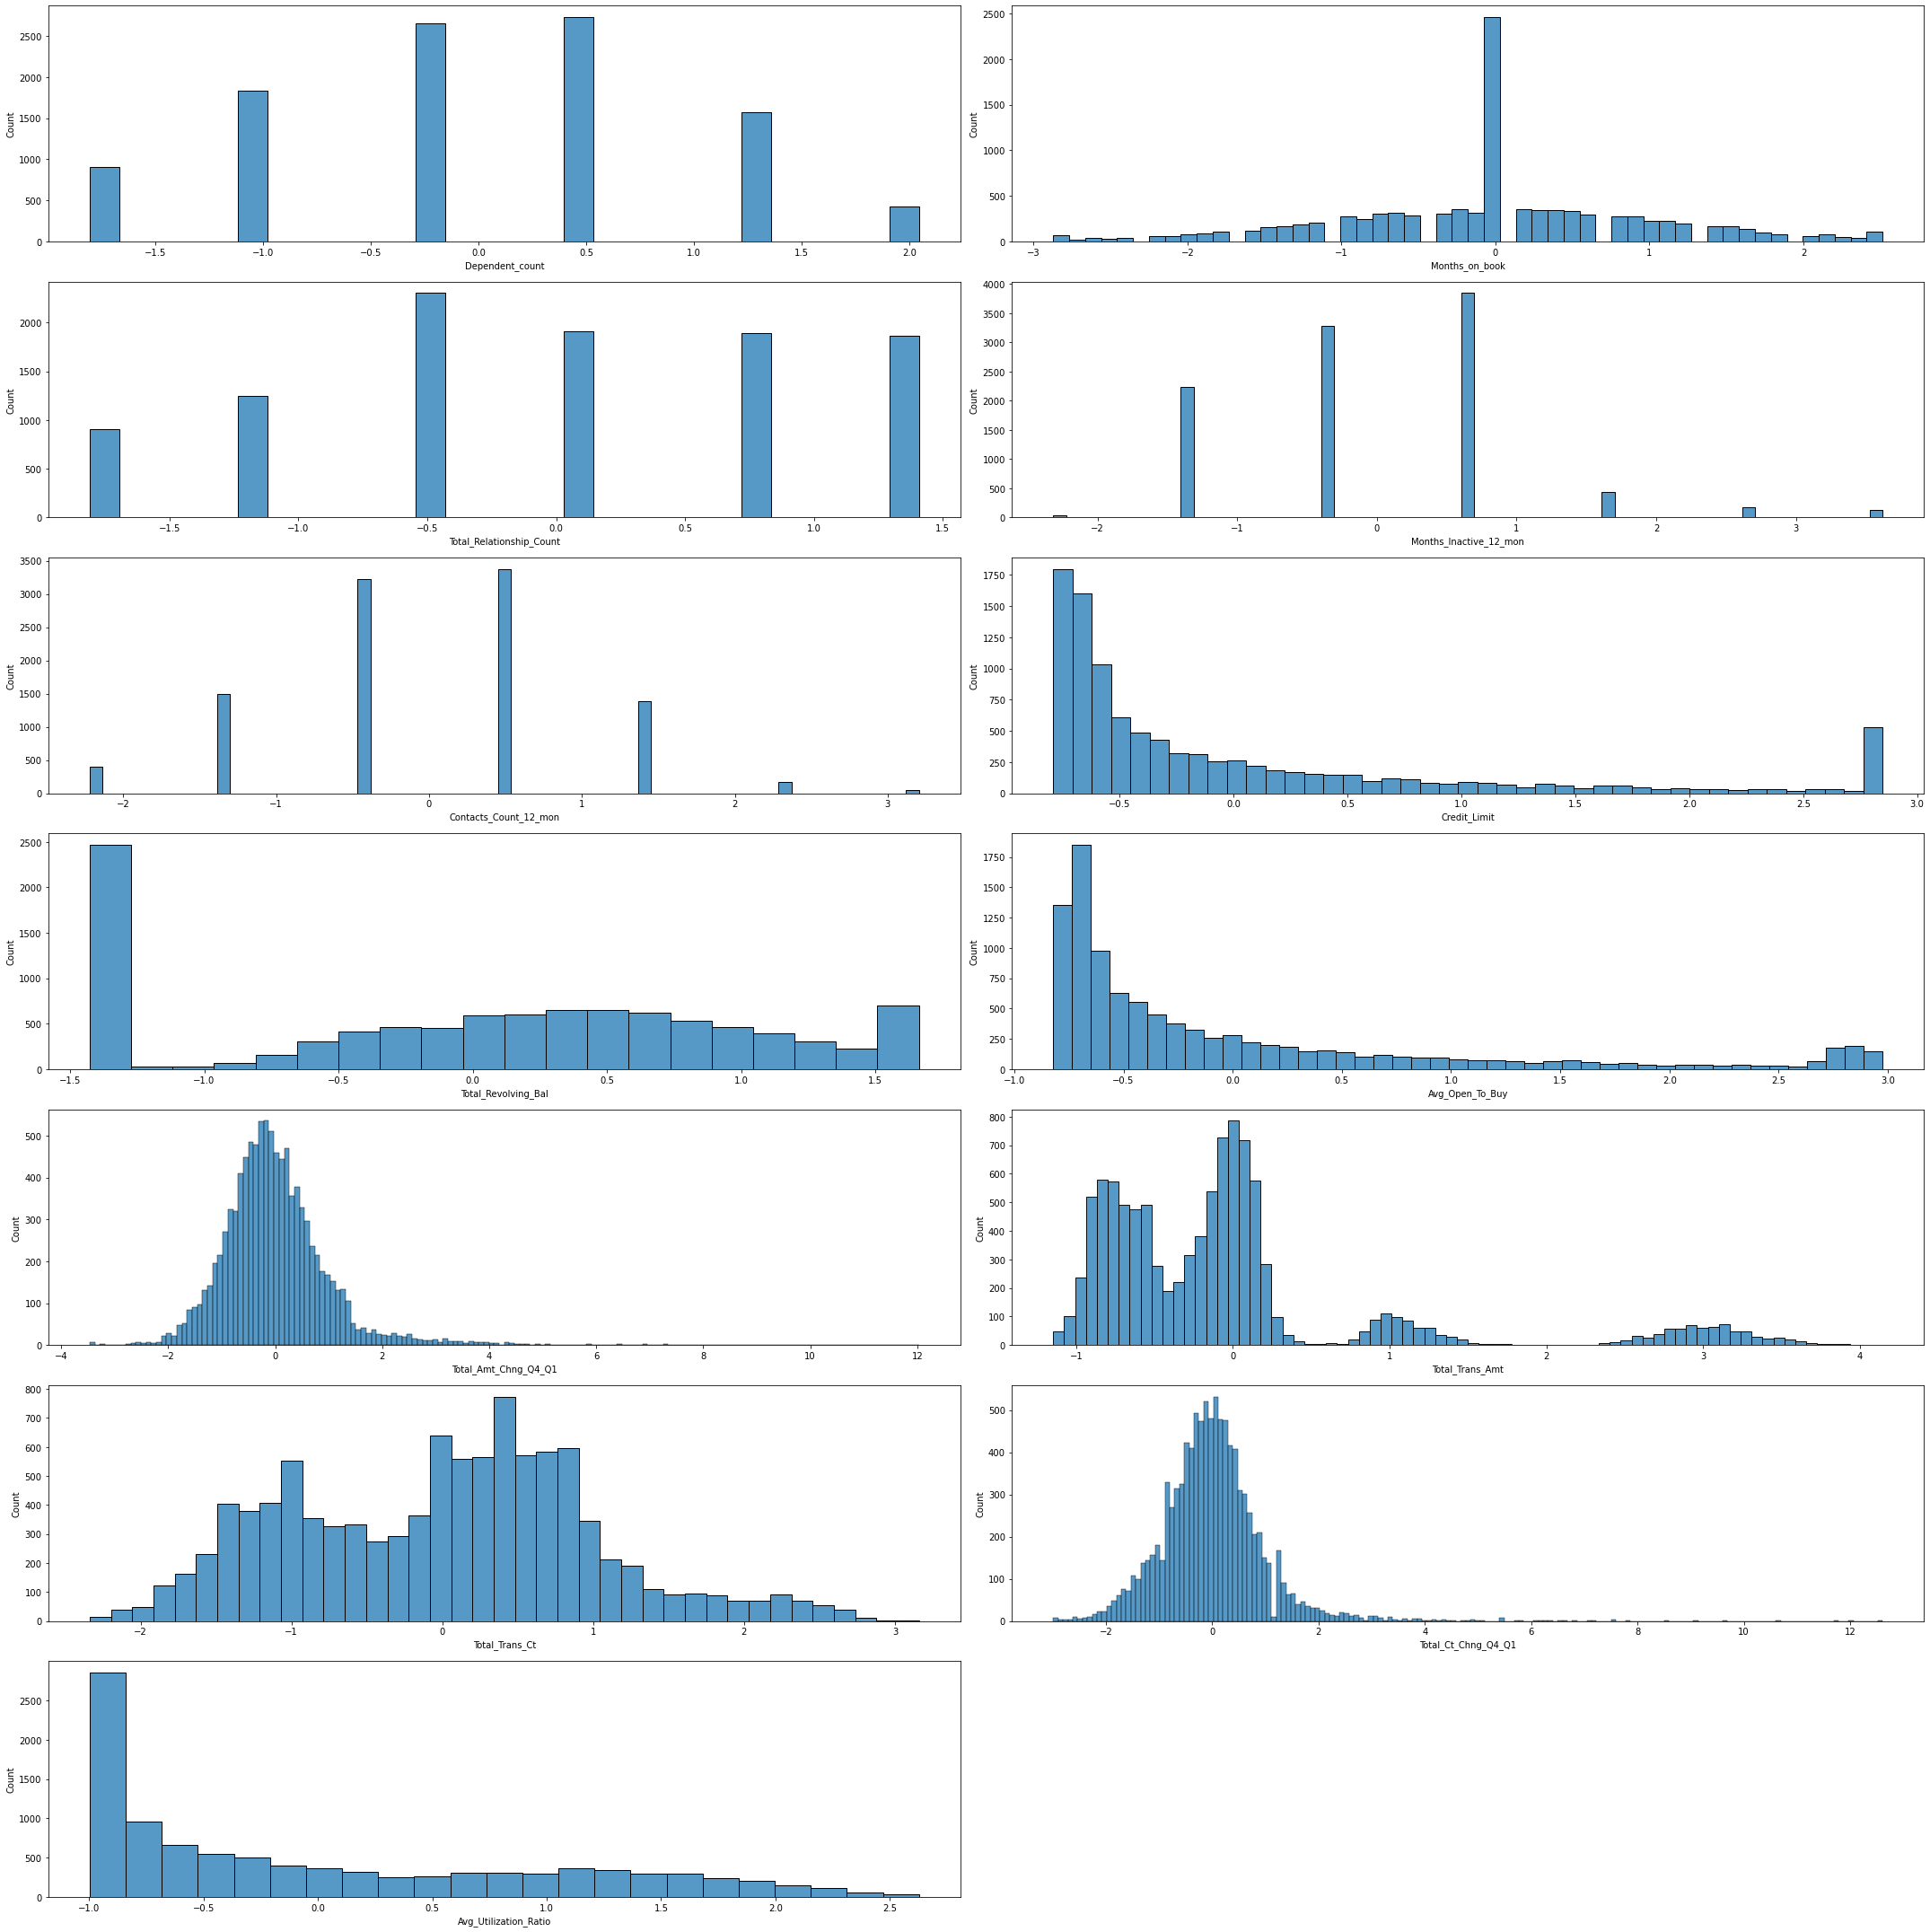

In [21]:
plt.figure(figsize=(30,30))
plt.subplot(721)
sns.histplot(x_standard['Dependent_count'])
plt.subplot(722)
sns.histplot(x_standard['Months_on_book'])
plt.subplot(723)
sns.histplot(x_standard['Total_Relationship_Count'])
plt.subplot(724)
sns.histplot(x_standard['Months_Inactive_12_mon'])
plt.subplot(725)
sns.histplot(x_standard['Contacts_Count_12_mon'])
plt.subplot(726)
sns.histplot(x_standard['Credit_Limit'])
plt.subplot(727)
sns.histplot(x_standard['Total_Revolving_Bal'])
plt.subplot(728)
sns.histplot(x_standard['Avg_Open_To_Buy'])
plt.subplot(729)
sns.histplot(x_standard['Total_Amt_Chng_Q4_Q1'])
plt.subplot(7,2,10)
sns.histplot(x_standard['Total_Trans_Amt'])
plt.subplot(7,2,11)
sns.histplot(x_standard['Total_Trans_Ct'])
plt.subplot(7,2,12)
sns.histplot(x_standard['Total_Ct_Chng_Q4_Q1'])
plt.subplot(7,2,13)
sns.histplot(x_standard['Avg_Utilization_Ratio'])
plt.tight_layout()
plt.show()

Distribusi pada data tidak mengalami perubahan sehingga aman untuk di lakukan scaling

<h1>Modeling

model yang dibuat akan di gunakan untuk melakukan predict pada customer apakah mereka Chunr atau Retain sehingga model ini masuk ke dalam Classification
<br>
pada project ini kita akan mencoba menggunakan 4 model
- Logistic Regression
- KNN
- Decision tree
- Random Forest
<br>

dengan focus:
- kita menggunakan pr curve karena akan fokus pada 1 class saja(Churn)
- dengan focus pada recall (recall= truepositives / truepositives+falsenegatives)kita akan fokus pada recall karena fokus kepada customer yang churn mengeluarkan cost lebih jika melakukan treatment kepada customer yang di predict churn tetapi actualnya retain

pada pengujian model ini kita akan melakukan:
- menggunakan model default unutk di jadikna benchmark
- melakukan hyper parameter tunning menggunakan Grid Search
- membandingkan model

# Logistic Regression

Encoder:
- onehot:
    - Attrition_Flag
    - Gender
    - Marital Status
    
- Ordinal:
    - Education Level
    - income-Category
    - Card_Category
    

## Data Preprocess

In [22]:
## Object column
# lr_pipe_obj = Pipeline([

#     ('onehot', OneHotEncoder(drop='first')),
# ])
# Mapping column
ordinal_mapping = [
    {
        'col':'Education_Level',
        'mapping':{'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
    },
    {
        'col':'Income_Category',
        'mapping':{'Unknown':0,'Less than $40K':1, '$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
    },
    {
        'col':'Card_Category',
        'mapping':{'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
    }
]

ordinal_encoder = ce.OrdinalEncoder(cols = ['Education_Level','Income_Category','Card_Category'],mapping= ordinal_mapping)

# Column Transfo
# scaling column pur numweric
lr_transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'),['Gender','Marital_Status']),
    ('or_pipe', ordinal_encoder, ['Education_Level','Income_Category','Card_Category']),
    ('scale',StandardScaler(),[ 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])
], remainder='passthrough')


logit = LogisticRegression(random_state=2020)
rfe = RFE(estimator=logit)
balance = SMOTE()

all_pipe = Pipeline([
    ('transformer', lr_transformer),
    ('rfe', rfe),
    ('clf',logit)
])

In [44]:
# df.dtypes

In [24]:
all_pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Marital_Status']),
                                                 ('or_pipe',
                                                  OrdinalEncoder(cols=['Education_Level',
                                                                       'Income_Category',
                                                                       'Card_Category'],
                                                                 mapping=[{'col': 'Education_Level',
                                                                           'mapping': {'College': 3,
                                                                                       'Doctorate': 6,
                                                    

In [25]:
# x_train_pr=pd.DataFrame(lr_transformer.fit_transform(x_train))
# x_train_pr.dtypes

In [26]:
lr_pred = all_pipe.predict(x_test)
lr_proba = all_pipe.predict_proba(x_test)
print(classification_report(y_test, lr_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, lr_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,lr_pred))*100.0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1701
           1       0.77      0.60      0.67       325

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026

Accuracy: 90.72%
Recall: 59.69%


In [27]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test,lr_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, lr_pred))

[[1644   57]
 [ 131  194]]


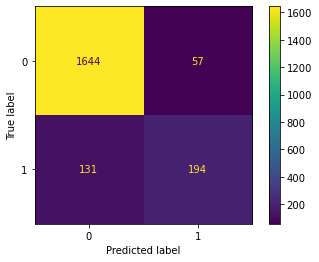

In [28]:
plot_confusion_matrix(all_pipe, x_test, y_test)

In [29]:
pre_lr, rec_lr, thr_lr = precision_recall_curve(y_test, lr_proba[:,1])
auc_lr = auc(rec_lr,pre_lr)
auc_lr

0.7730054381112682

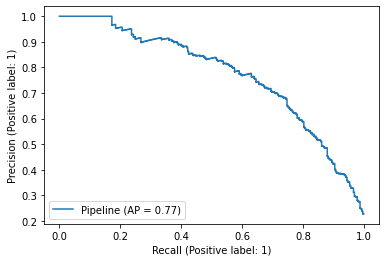

In [30]:
plot_precision_recall_curve(all_pipe, x_test, y_test)
# pr untuk 1 class
# rox 2 class

kita menggunakan pr curve karena akan fokus pada 1 class saja(Churn)

In [31]:
model_cv = cross_val_score(all_pipe, x_train, y_train, scoring='recall')
print('CV Score:', model_cv)
print('CV Score Mean:', model_cv.mean())
print('CV Score Std:', model_cv.std())

CV Score: [0.60536398 0.63846154 0.62692308 0.50384615 0.52490421]
CV Score Mean: 0.5798997936928971
CV Score Std: 0.05495045404107299


## LR Model Tunned without Balancing

In [32]:
model_lr = logit
balance = SMOTE()
skfold = StratifiedKFold(n_splits=5)

lr_hyper_param = {
    'clf__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'clf__max_iter':[100, 200, 300, 400, 500, 1000, 1200],
#     'clf__class_weight':['balanced'],
    'clf__solver': ['liblinear', 'newton-cg','sag','lbfgs']
    
}

grid_search_lr = GridSearchCV(
    all_pipe,
    param_grid = lr_hyper_param,
    cv = StratifiedKFold(),
    scoring ='recall',
    n_jobs = -1,
    verbose =1
)

In [33]:
# grid_search_lr.get_params().keys()

In [34]:
grid_search_lr.fit(x_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'

In [35]:
print('estimator lr tuned score:', grid_search_lr.best_score_)
print('estimator lr best params:', grid_search_lr.best_params_)

estimator lr tuned score: 0.5829708222811671
estimator lr best params: {'clf__C': 5, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}


In [36]:
lr_tuned = grid_search_lr.best_estimator_
lr_tuned_pred = lr_tuned.predict(x_test)
lr_tuned_prob = lr_tuned.predict_proba(x_test)

In [37]:
print(classification_report(y_test, lr_tuned_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, lr_tuned_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,lr_tuned_pred))*100.0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1701
           1       0.77      0.60      0.67       325

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026

Accuracy: 90.67%
Recall: 59.69%


In [38]:
tn_lr_tn, fp_lr_tn, fn_lr_tn, tp_lr_tn = confusion_matrix(y_test,lr_tuned_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, lr_tuned_pred))

[[1643   58]
 [ 131  194]]


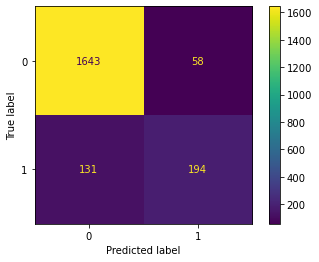

In [39]:
plot_confusion_matrix(lr_tuned, x_test, y_test)

tidak ada perubahan yang signifikan hanay TN bertambah 1

In [40]:
pre_lr_tuned, rec_lr_tuned, thr_lr_tuned = precision_recall_curve(y_test, lr_tuned_prob[:,1])
prc_lr = auc(rec_lr_tuned, pre_lr_tuned)
prc_lr

0.7726082743687935

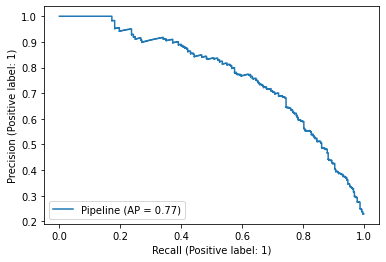

In [41]:
plot_precision_recall_curve(lr_tuned,x_test,y_test)

In [42]:
model_lr_tn_cv = cross_val_score(lr_tuned, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("LR TUNED CV")
print('CV Score:', model_lr_tn_cv)
print('CV Score Mean:',model_lr_tn_cv.mean())
print('CV Score Std:', model_lr_tn_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LR TUNED CV
CV Score: [0.60536398 0.64615385 0.62692308 0.50384615 0.53256705]
CV Score Mean: 0.5829708222811671
CV Score Std: 0.05518442234943423


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


## LR Tuned With SMOTE

In [43]:
balance = SMOTE()
all_pipe_bal = Pipeline([
    ('transformer', lr_transformer),
    ('rfe', rfe),
    ('balance', balance),
    ('clf',logit)
])

grid_search_lr_bal = GridSearchCV(
    all_pipe_bal,
    param_grid = lr_hyper_param,
    cv = StratifiedKFold(),
    scoring ='recall',
    n_jobs = -1,
    verbose =1
)

In [44]:
grid_search_lr_bal.fit(x_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'

In [45]:
print('estimator lr_balanced tuned score:', grid_search_lr_bal.best_score_)
print('estimator lr_balanced best params:', grid_search_lr_bal.best_params_)

estimator lr_balanced tuned score: 0.8802269378131446
estimator lr_balanced best params: {'clf__C': 0.0001, 'clf__max_iter': 200, 'clf__solver': 'liblinear'}


In [46]:
lr_tuned_bal = grid_search_lr_bal.best_estimator_
lr_tuned_bal_pred = lr_tuned_bal.predict(x_test)
lr_tuned_bal_prob = lr_tuned_bal.predict_proba(x_test)

In [47]:
print(classification_report(y_test, lr_tuned_bal_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, lr_tuned_bal_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,lr_tuned_bal_pred))*100.0))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1701
           1       0.35      0.88      0.50       325

    accuracy                           0.72      2026
   macro avg       0.66      0.79      0.65      2026
weighted avg       0.87      0.72      0.76      2026

Accuracy: 72.11%
Recall: 88.31%


In [48]:
tn_lr_tn_sm, fp_lr_tn_sm, fn_lr_tn_sm, tp_lr_tn_sm = confusion_matrix(y_test,lr_tuned_bal_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, lr_tuned_bal_pred))

[[1174  527]
 [  38  287]]


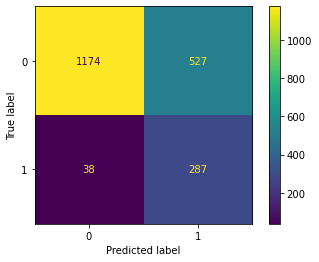

In [49]:
plot_confusion_matrix(lr_tuned_bal, x_test, y_test)

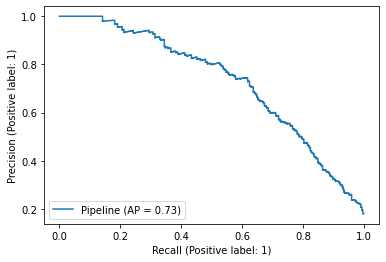

In [50]:
plot_precision_recall_curve(lr_tuned_bal,x_test,y_test)

In [51]:
pre_lr_sm, rec_lr_sm, thr_lr_sm = precision_recall_curve(y_test, lr_tuned_bal_prob[:,1])
auc_lr_sm = auc(rec_lr_sm,pre_lr_sm)
auc_lr_sm

0.7292097262423882

In [52]:
model_lr_bal_cv = cross_val_score(lr_tuned_bal, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("LR TUNED W SMOTE CV")
print('CV Score:', model_lr_bal_cv)
print('CV Score Mean:',model_lr_bal_cv.mean())
print('CV Score Std:', model_lr_bal_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s


LR TUNED W SMOTE CV
CV Score: [0.88122605 0.90769231 0.91538462 0.87307692 0.81992337]
CV Score Mean: 0.8794606542882406
CV Score Std: 0.03369306729305751


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


## Model Comparison

In [53]:
lr_comparison = pd.DataFrame({
  "LR Default":[accuracy_score(y_test,lr_pred),precision_score(y_test,lr_pred),recall_score(y_test,lr_pred),f1_score(y_test,lr_pred),
                tp_lr,tn_lr,fp_lr,fn_lr],
    "LR TUNED":[accuracy_score(y_test,lr_tuned_pred),precision_score(y_test,lr_tuned_pred),recall_score(y_test,lr_tuned_pred),f1_score(y_test,lr_tuned_pred),
                tp_lr_tn,tn_lr_tn,fp_lr_tn,fn_lr_tn],
    "LR TUNED SMOTE":[accuracy_score(y_test,lr_tuned_bal_pred),precision_score(y_test,lr_tuned_bal_pred),recall_score(y_test,lr_tuned_bal_pred),f1_score(y_test,lr_tuned_bal_pred),
                 tp_lr_tn_sm,tn_lr_tn_sm,fp_lr_tn_sm,fn_lr_tn_sm]
},index = ['Acuracy Score','precision Score','recall score','f1 score','TP','TN','FP','FN'])
lr_comparison

,LR Default,LR TUNED,LR TUNED SMOTE
Acuracy Score,0.907206,0.906713,0.721125
precision Score,0.772908,0.769841,0.352580
recall score,0.596923,0.596923,0.883077
f1 score,0.673611,0.672444,0.503951
TP,194.000000,194.000000,287.000000
TN,1644.000000,1643.000000,1174.000000
FP,57.000000,58.000000,527.000000
FN,131.000000,131.000000,38.000000


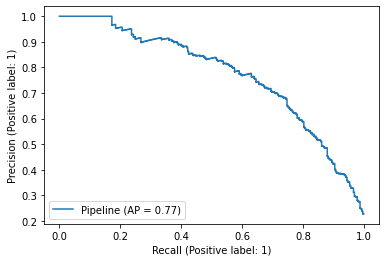

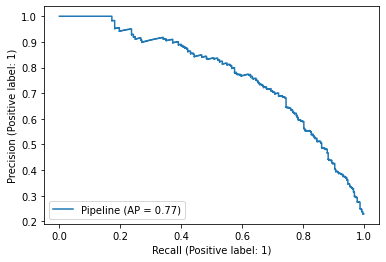

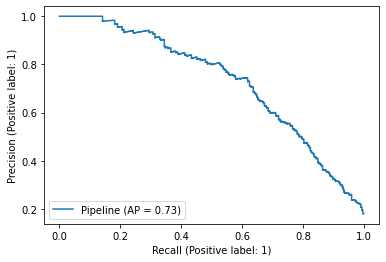

In [54]:
plot_precision_recall_curve(all_pipe, x_test, y_test)
plot_precision_recall_curve(lr_tuned, x_test, y_test)
plot_precision_recall_curve(lr_tuned_bal, x_test, y_test)

## DTC Model

pada model DTC one-hot column tidak di sarankan karena dapat menambah banyak kolom sehingga dapat menggangu performa dari mode
<br>
maka pada di model ini akan melakuna encoding ulang dengan menggunakan binary encoder untuk kolom one-hotsebelumnya

### Withou Scaling

In [55]:
ordinal_mapping = [
    {
        'col':'Education_Level',
        'mapping':{'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
    },
    {
        'col':'Income_Category',
        'mapping':{'Unknown':0,'Less than $40K':1, '$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
    },
    {
        'col':'Card_Category',
        'mapping':{'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
    }
]

ordinal_encoder = ce.OrdinalEncoder(cols = ['Education_Level','Income_Category','Card_Category'],mapping= ordinal_mapping)

# Column Transfo
# scaling column pur numweric
dtc_transformer = ColumnTransformer([
    ('binary',ce.BinaryEncoder(),['Gender','Marital_Status']),
    ('or_pipe', ordinal_encoder, ['Education_Level','Income_Category','Card_Category'])
], remainder='passthrough')


dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=2021, class_weight='balanced')
rfe = RFE(estimator=dtc)


all_pipe_dtc = Pipeline([
    ('transformer', dtc_transformer),
    ('rfe', rfe),
    ('clf',dtc)
])

In [56]:
all_pipe_dtc.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Gender', 'Marital_Status']),
                                                 ('or_pipe',
                                                  OrdinalEncoder(cols=['Education_Level',
                                                                       'Income_Category',
                                                                       'Card_Category'],
                                                                 mapping=[{'col': 'Education_Level',
                                                                           'mapping': {'College': 3,
                                                                                       'Doctorate': 6,
                                                                                       'Graduate': 4,
             

In [57]:
# x_train_prepro = pd.DataFrame(dtc_transformer.fit_transform(x_train))
# x_train_prepro

In [58]:
dtc_pred = all_pipe_dtc.predict(x_test)
dtc_proba = all_pipe_dtc.predict_proba(x_test)

In [59]:
print(classification_report(y_test,dtc_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, dtc_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,dtc_pred))*100.0))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1701
           1       0.72      0.88      0.79       325

    accuracy                           0.92      2026
   macro avg       0.85      0.91      0.87      2026
weighted avg       0.93      0.92      0.93      2026

Accuracy: 92.45%
Recall: 87.69%


In [60]:
tn_dtc, fp_dtc, fn_dtc, tp_dtc = confusion_matrix(y_test,dtc_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test,dtc_pred))

[[1588  113]
 [  40  285]]


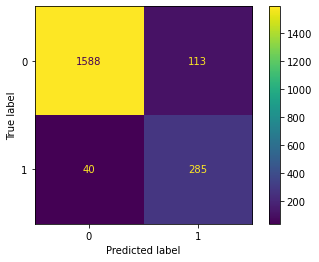

In [61]:
plot_confusion_matrix(all_pipe_dtc, x_test, y_test)

In [62]:
pre_dtc, rec_dtc, thr_dtc = precision_recall_curve(y_test, dtc_proba[:,1])
auc_dtc = auc(rec_dtc,pre_dtc)
auc_dtc

0.8225359949895803

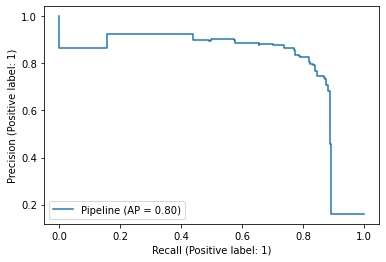

In [63]:
plot_precision_recall_curve(all_pipe_dtc, x_test, y_test)

In [64]:
model_dtc_cv = cross_val_score(all_pipe_dtc, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("DTC CV")
print('CV Score:', model_dtc_cv)
print('CV Score Mean:',model_dtc_cv.mean())
print('CV Score Std:', model_dtc_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.5s


DTC CV
CV Score: [0.87356322 0.88846154 0.86923077 0.87307692 0.85823755]
CV Score Mean: 0.8725139994105511
CV Score Std: 0.009698849557136702


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


# DTC Tuned

In [65]:
# grid_search_dtc.get_params().keys()

In [66]:

skfold = StratifiedKFold(n_splits=5)


dtc_hyper_param = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5,10,15,20,25,30],
    'clf__min_samples_split': [5,6,7,8,9,10],
    'rfe__n_features_to_select': [None,5,6,7,8],
    'clf__random_state':[2021],
    'clf__class_weight':['balanced']
}

grid_search_dtc = GridSearchCV(
    all_pipe_dtc,
    param_grid = dtc_hyper_param,
    cv = StratifiedKFold(),
    scoring = 'recall',
    n_jobs = -1,
    verbose = 1
)

In [67]:
grid_search_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'],
          

In [68]:
print('estimator dtc tuned score:', grid_search_dtc.best_score_)
print('estimator dtc best params:', grid_search_dtc.best_params_)

estimator dtc tuned score: 0.9139728853521956
estimator dtc best params: {'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__random_state': 2021, 'rfe__n_features_to_select': None}


In [69]:
dtc_tuned = grid_search_dtc.best_estimator_
dtc_tuned_pred = dtc_tuned.predict(x_test)
dtc_tuned_prob = dtc_tuned.predict_proba(x_test)

In [70]:
print(classification_report(y_test, dtc_tuned_pred))
print("Accuracy: %.2f%%"% (accuracy_score(y_test, dtc_tuned_pred)*100.0))
print("Recall: %.2f%%"% (recall_score(y_test, dtc_tuned_pred)*100.0))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1701
           1       0.63      0.88      0.74       325

    accuracy                           0.90      2026
   macro avg       0.80      0.89      0.84      2026
weighted avg       0.92      0.90      0.91      2026

Accuracy: 89.93%
Recall: 88.31%


In [71]:
tn_dtc_tune, fp_dtc_tune, fn_dtc_tune, tp_dtc_tune = confusion_matrix(y_test,dtc_tuned_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test,dtc_tuned_pred))

[[1535  166]
 [  38  287]]


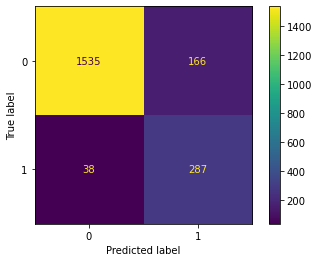

In [72]:
plot_confusion_matrix(dtc_tuned, x_test,y_test)

In [73]:
pre_dtc_tune, rec_dtc_tune, thr_dtc_tune = precision_recall_curve(y_test,dtc_tuned_prob[:,1])
dtc_tune_auc = auc(rec_dtc_tune,pre_dtc_tune)
dtc_tune_auc

0.8179710035140944

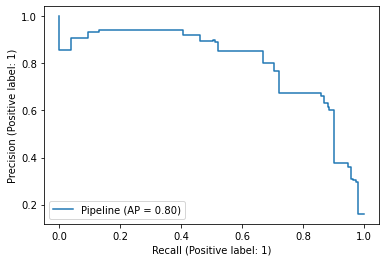

In [74]:
plot_precision_recall_curve(dtc_tuned, x_test, y_test)

In [75]:
model_dtc_tn_cv = cross_val_score(dtc_tuned, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("DTC TUNED")
print('CV Score:', model_dtc_tn_cv)
print('CV Score Mean:',model_dtc_tn_cv.mean())
print('CV Score Std:', model_dtc_tn_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s


DTC TUNED
CV Score: [0.94252874 0.91538462 0.92692308 0.89230769 0.89272031]
CV Score Mean: 0.9139728853521956
CV Score Std: 0.019525315493350986


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


## With balancing smote

In [76]:
balance = SMOTE()
all_pipe_dtc = Pipeline([
    ('transformer', lr_transformer),
    ('rfe', rfe),
    ('balance', balance),
    ('clf',dtc)
])

grid_search_dtc_sm = GridSearchCV(
    all_pipe_dtc,
    param_grid = dtc_hyper_param,
    cv = StratifiedKFold(),
    scoring = 'recall',
    n_jobs = -1,
    verbose = 1
)

In [77]:
grid_search_dtc_sm.fit(x_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'

In [78]:
print('estimator dtc tuned score:', grid_search_dtc_sm.best_score_)
print('estimator dtc best params:', grid_search_dtc_sm.best_params_)

estimator dtc tuned score: 0.89552608311229
estimator dtc best params: {'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__random_state': 2021, 'rfe__n_features_to_select': 5}


In [79]:
dtc_sm = grid_search_dtc_sm.best_estimator_
dtc_sm_pred = dtc_sm.predict(x_test)
dtc_sm_prob = dtc_sm.predict_proba(x_test)

In [80]:
print(classification_report(y_test,dtc_sm_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, dtc_sm_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,dtc_sm_pred))*100.0))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1701
           1       0.66      0.85      0.74       325

    accuracy                           0.90      2026
   macro avg       0.81      0.88      0.84      2026
weighted avg       0.92      0.90      0.91      2026

Accuracy: 90.42%
Recall: 84.92%


In [81]:
tn_dtc_sm, fp_dtc_sm, fn_dtc_sm, tp_dtc_sm = confusion_matrix(y_test,dtc_sm_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test,dtc_sm_pred))

[[1556  145]
 [  49  276]]


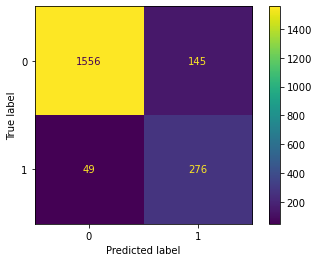

In [82]:
plot_confusion_matrix(dtc_sm, x_test,y_test)


In [83]:
pre_dtc_sm, rec_dtc_sm, yht_dtc_sm = precision_recall_curve(y_test,dtc_sm_prob[:,1])
dtc_sm_auc = auc(rec_dtc_sm,pre_dtc_sm)
dtc_sm_auc

0.8113107070330922

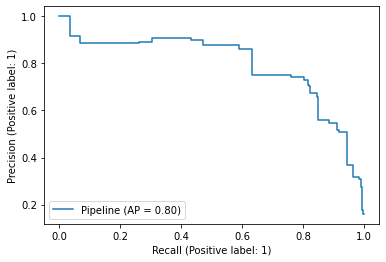

In [84]:
plot_precision_recall_curve(dtc_sm,x_test,y_test)

model pada dtc tidak mengalami improvement

In [85]:
model_dtc_sm_cv = cross_val_score(dtc_sm, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("DTC TUNED SMOTE CV")
print('CV Score:', model_dtc_sm_cv)
print('CV Score Mean:',model_dtc_sm_cv.mean())
print('CV Score Std:', model_dtc_sm_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s


DTC TUNED SMOTE CV
CV Score: [0.89655172 0.89615385 0.94615385 0.85769231 0.88122605]
CV Score Mean: 0.8955555555555555
CV Score Std: 0.028984469906691842


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


### DTC Model comparison

In [86]:
dtc_comparison = pd.DataFrame({
    "DTC Default":[accuracy_score(y_test,dtc_pred),precision_score(y_test,dtc_pred),recall_score(y_test,dtc_pred),auc_dtc,f1_score(y_test,dtc_pred),
                tp_dtc,tn_dtc,fp_dtc,fn_dtc],
    "DTC Tuned":[accuracy_score(y_test,dtc_tuned_pred),precision_score(y_test,dtc_tuned_pred),recall_score(y_test,dtc_tuned_pred),dtc_tune_auc,f1_score(y_test,dtc_tuned_pred),
                tp_dtc_tune,tn_dtc_tune,fp_dtc_tune,fn_dtc_tune],
    "DTC Tuned smote":[accuracy_score(y_test,dtc_sm_pred),precision_score(y_test,dtc_sm_pred),recall_score(y_test,dtc_sm_pred),dtc_sm_auc,f1_score(y_test,dtc_sm_pred),
                tp_dtc_sm,tn_dtc_sm,fp_dtc_sm,fn_dtc_sm],

},index = ['Acuracy Score','precision Score','recall score','AUC','f1 score','TP','TN','FP','FN'])
dtc_comparison

,DTC Default,DTC Tuned,DTC Tuned smote
Acuracy Score,0.924482,0.899309,0.904245
precision Score,0.716080,0.633554,0.655582
recall score,0.876923,0.883077,0.849231
AUC,0.822536,0.817971,0.811311
f1 score,0.788382,0.737789,0.739946
TP,285.000000,287.000000,276.000000
TN,1588.000000,1535.000000,1556.000000
FP,113.000000,166.000000,145.000000
FN,40.000000,38.000000,49.000000


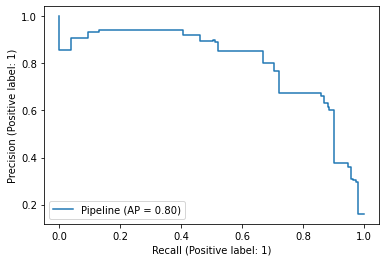

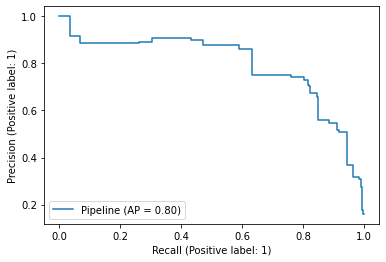

In [87]:
# print(plot_precision_recall_curve(all_pipe_dtc, x_test, y_test))
print(plot_precision_recall_curve(dtc_tuned, x_test, y_test))
print(plot_precision_recall_curve(dtc_sm,x_test,y_test))

# KNN

In [88]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

## KNN Pipeline

In [89]:
## Object column
# lr_pipe_obj = Pipeline([

#     ('onehot', OneHotEncoder(drop='first')),
# ])
# Mapping column
ordinal_mapping = [
    {
        'col':'Education_Level',
        'mapping':{'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
    },
    {
        'col':'Income_Category',
        'mapping':{'Unknown':0,'Less than $40K':1, '$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
    },
    {
        'col':'Card_Category',
        'mapping':{'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
    }
]

ordinal_encoder = ce.OrdinalEncoder(cols = ['Education_Level','Income_Category','Card_Category'],mapping= ordinal_mapping)

# Column Transfo
# scaling column pur numweric
knn_transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'),['Gender','Marital_Status']),
    ('or_pipe', ordinal_encoder, ['Education_Level','Income_Category','Card_Category']),
    ('scale',RobustScaler(),[ 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])
], remainder='passthrough')


knn = KNeighborsClassifier(n_neighbors=5)
balance = SMOTE()

knn_all_pipe = Pipeline([
    ('transformer', knn_transformer),
    ('balance', balance),
    ('clf',knn)
])

In [90]:
knn_all_pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Marital_Status']),
                                                 ('or_pipe',
                                                  OrdinalEncoder(cols=['Education_Level',
                                                                       'Income_Category',
                                                                       'Card_Category'],
                                                                 mapping=[{'col': 'Education_Level',
                                                                           'mapping': {'College': 3,
                                                                                       'Doctorate': 6,
                                                    

In [91]:
knn_pred = knn_all_pipe.predict(x_test)
knn_prob = knn_all_pipe.predict_proba(x_test)

In [92]:
print(classification_report(y_test,knn_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, knn_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,knn_pred))*100.0))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.54      0.83      0.65       325

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.89      0.86      0.87      2026

Accuracy: 85.78%
Recall: 82.77%


In [93]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test,knn_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test,knn_pred))

[[1469  232]
 [  56  269]]


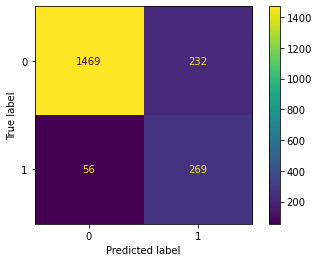

In [94]:
plot_confusion_matrix(knn_all_pipe, x_test,y_test)

In [95]:
pre_knn, rec_knn, thr_knn = precision_recall_curve(y_test,knn_prob[:,1])
knn_auc = auc(rec_knn,pre_knn)
knn_auc

0.7032254872025698

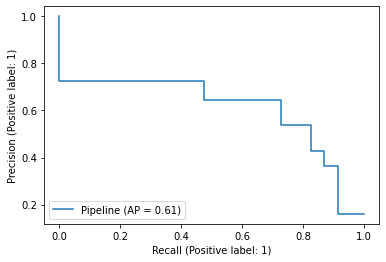

In [96]:
plot_precision_recall_curve(knn_all_pipe,x_test,y_test)

In [97]:
model_knn_cv = cross_val_score(knn_all_pipe, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("KNN CV")
print('CV Score:', model_knn_cv)
print('CV Score Mean:', model_knn_cv.mean())
print('CV Score Std:', model_knn_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


KNN CV
CV Score: [0.82758621 0.88076923 0.89615385 0.83076923 0.80076628]
CV Score Mean: 0.8472089596227527
CV Score Std: 0.03559250760884195


## KNN Tuned

In [98]:
skfold = StratifiedKFold(n_splits=5)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
knn_hyper_param = {
    'clf__n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'clf__leaf_size':[1,2,3,5,6,7,8],
    'clf__weights':['uniform', 'distance'],
    'clf__algorithm':['auto', 'ball_tree','kd_tree','brute']   
}

grid_search_knn = GridSearchCV(
    knn_all_pipe,
    param_grid = knn_hyper_param,
    cv = skfold,
    scoring='recall',
    n_jobs = -1,
    verbose = 1
)

In [99]:
grid_search_knn.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'

In [100]:
knn_tuned = grid_search_knn.best_estimator_
knn_pred_tn = knn_tuned.predict(x_test)
knn_prob_tn = knn_tuned.predict_proba(x_test)

In [101]:
print(classification_report(y_test,knn_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, knn_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,knn_pred))*100.0))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.54      0.83      0.65       325

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.89      0.86      0.87      2026

Accuracy: 85.78%
Recall: 82.77%


In [102]:
tn_knn_tn, fp_knn_tn, fn_knn_tn,  tp_knn_tn = confusion_matrix(y_test,knn_pred_tn, labels=[0,1]).ravel()
(confusion_matrix(y_test,knn_pred_tn))

array([[1437,  264],
       [  47,  278]], dtype=int64)

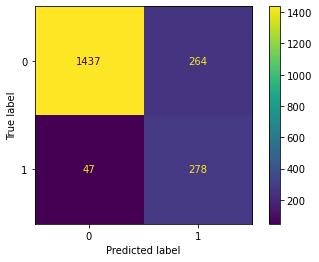

In [103]:
plot_confusion_matrix(knn_tuned,x_test,y_test)

In [104]:
pre_knn_tn, rec_knn_tn, thr_knn_tn = precision_recall_curve(y_test,knn_prob[:,1])
knn_auc = auc(rec_knn_tn,pre_knn_tn)
knn_auc

0.7032254872025698

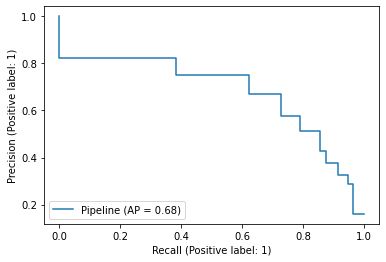

In [105]:
plot_precision_recall_curve(knn_tuned,x_test,y_test)

In [107]:
model_knn_tn_cv = cross_val_score(knn_tuned, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("KNN TUNED CV")
print('CV Score:', model_knn_tn_cv)
print('CV Score Mean:',model_knn_tn_cv.mean())
print('CV Score Std:', model_knn_tn_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.6s remaining:   40.0s


KNN TUNED CV
CV Score: [0.85440613 0.93076923 0.89230769 0.83846154 0.84291188]
CV Score Mean: 0.8717712938402593
CV Score Std: 0.03506124598682887


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.3s finished


## Model Compare

In [108]:
dtc_comparison = pd.DataFrame({
    "KNN Default":[accuracy_score(y_test,knn_pred),precision_score(y_test,knn_pred),recall_score(y_test,knn_pred),auc_dtc,f1_score(y_test,knn_pred),
                tp_knn,tn_knn,fp_knn,fn_knn],
    "KNN Tuned":[accuracy_score(y_test,knn_pred_tn),precision_score(y_test,knn_pred_tn),recall_score(y_test,knn_pred_tn),auc_dtc,f1_score(y_test,knn_pred_tn),
                tp_knn_tn,tn_knn_tn,fp_knn_tn,fn_knn_tn]

},index = ['Acuracy Score','precision Score','recall score','AUC','f1 score','TP','TN','FP','FN'])
dtc_comparison

,KNN Default,KNN Tuned
Acuracy Score,0.857848,0.846496
precision Score,0.536926,0.512915
recall score,0.827692,0.855385
AUC,0.822536,0.822536
f1 score,0.651332,0.641292
TP,269.000000,278.000000
TN,1469.000000,1437.000000
FP,232.000000,264.000000
FN,56.000000,47.000000


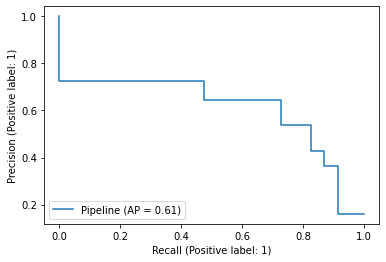

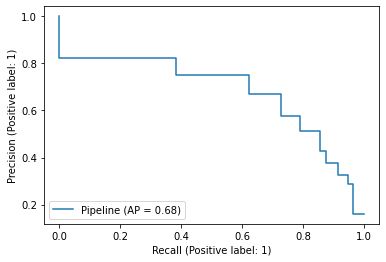

In [109]:
print(plot_precision_recall_curve(knn_all_pipe,x_test,y_test))
print(plot_precision_recall_curve(knn_tuned,x_test,y_test))

## Random Forest

In [110]:
rf = RandomForestClassifier()

## Random Foresst PipeLine

karena random forest bukan merupakan distance based maka tidak di perlukan scaling pada model ini dan juga tidak mengunakan one hot encoder

In [22]:
ordinal_mapping = [
    {
        'col':'Education_Level',
        'mapping':{'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
    },
    {
        'col':'Income_Category',
        'mapping':{'Unknown':0,'Less than $40K':1, '$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
    },
    {
        'col':'Card_Category',
        'mapping':{'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
    }
]

ordinal_encoder = ce.OrdinalEncoder(cols = ['Education_Level','Income_Category','Card_Category'],mapping= ordinal_mapping)

# Column Transfo
# scaling column pur numweric
rf_transformer = ColumnTransformer([
    ('binary',ce.BinaryEncoder(),['Gender','Marital_Status']),
    ('or_pipe', ordinal_encoder, ['Education_Level','Income_Category','Card_Category'])
], remainder='passthrough')

skfold = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=20,min_samples_split=10, n_estimators=200)
rfe = RFE(estimator=rf)


all_pipe_rf = Pipeline([
    ('transformer', rf_transformer),
    ('rfe', rfe),
    ('clf',rf)
])

In [112]:
all_pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Gender', 'Marital_Status']),
                                                 ('or_pipe',
                                                  OrdinalEncoder(cols=['Education_Level',
                                                                       'Income_Category',
                                                                       'Card_Category'],
                                                                 mapping=[{'col': 'Education_Level',
                                                                           'mapping': {'College': 3,
                                                                                       'Doctorate': 6,
                                                                                       'Graduate': 4,
             

In [46]:
rf_pred = all_pipe_rf.predict(x_test)
rf_prob = all_pipe_rf.predict_proba(x_test)

In [114]:
print(classification_report(y_test,rf_pred))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_pred)*100.0))
print('Recall: %.2f%%' % (recall_score(y_test, rf_pred)*100.0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.83      0.87       325

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 96.20%
Recall: 82.77%


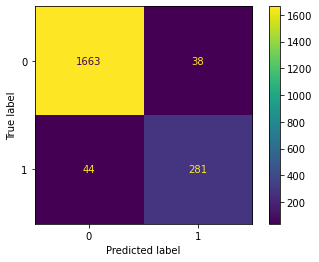

In [48]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, rf_pred, labels=[0,1]).ravel()
plot_confusion_matrix(all_pipe_rf,x_test,y_test)

In [49]:
prec_rf, rec_rf, thr_rf = precision_recall_curve(y_test,rf_prob[:,1])
auc_rf = auc(rec_rf,prec_rf)
auc_rf

0.9483094771336928

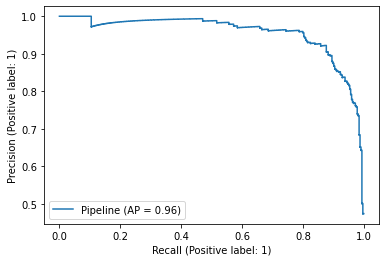

In [117]:
plot_precision_recall_curve(all_pipe_rf,x_test,y_test)

In [118]:
skfold

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [119]:
skfold = StratifiedKFold(n_splits=5)
model_rf_cv = cross_val_score(all_pipe_rf, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("Random Forest CV")
print('CV Score:', model_rf_cv)
print('CV Score Mean:', model_rf_cv.mean())
print('CV Score Std:', model_rf_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.7min


Random Forest CV
CV Score: [0.84291188 0.85       0.85       0.77307692 0.78927203]
CV Score Mean: 0.82105216622458
CV Score Std: 0.0330617667560196


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


## Random forest with Smote

In [24]:
balance = SMOTE()
all_pipe_rf_sm = Pipeline([
    ('transformer', rf_transformer),
    ('rfe', rfe),
    ('balance',balance),
    ('clf',rf)
])
all_pipe_rf_sm.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Gender', 'Marital_Status']),
                                                 ('or_pipe',
                                                  OrdinalEncoder(cols=['Education_Level',
                                                                       'Income_Category',
                                                                       'Card_Category'],
                                                                 mapping=[{'col': 'Education_Level',
                                                                           'mapping': {'College': 3,
                                                                                       'Doctorate': 6,
                                                                                       'Graduate': 4,
             

In [25]:
rf_sm_pred = all_pipe_rf_sm.predict(x_test)
rf_sm_prob = all_pipe_rf_sm.predict_proba(x_test)

In [26]:
print(classification_report(y_test, rf_sm_pred))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_sm_pred)*100.0))
print('Recall: %.2f%%' % (recall_score(y_test, rf_sm_pred)*100.0))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.88      0.86      0.87       325

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 95.95%
Recall: 86.46%


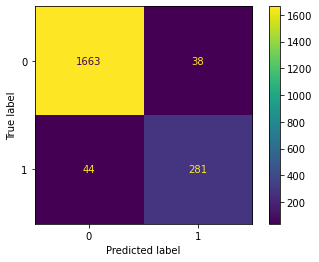

In [27]:
tn_rf_sm, fp_rf_sm, fn_rf_sm, tp_rf_sm = confusion_matrix(y_test,rf_sm_pred, labels=[1,0]).ravel()
plot_confusion_matrix(all_pipe_rf_sm,x_test,y_test)

In [28]:
prec_rf_sm, rec_rf_sm, thr_rf_sm = precision_recall_curve(y_test,rf_sm_prob[:,1])
rf_sm_auc = auc(rec_rf_sm,prec_rf_sm)
rf_sm_auc

0.9483094771336928

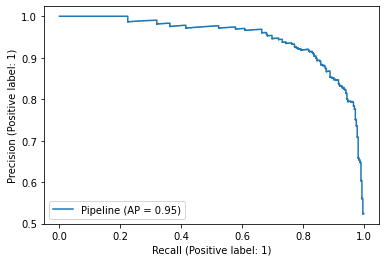

In [29]:
plot_precision_recall_curve(all_pipe_rf_sm,x_test,y_test)

In [30]:
model_rf_sm_cv = cross_val_score(all_pipe_rf_sm, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("Random Forest (SMOTE)CV")
print('CV Score:', model_rf_sm_cv)
print('CV Score Mean:', model_rf_sm_cv.mean())
print('CV Score Std:', model_rf_sm_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min


Random Forest (SMOTE)CV
CV Score: [0.88122605 0.90384615 0.90769231 0.83461538 0.85823755]
CV Score Mean: 0.8771234895372826
CV Score Std: 0.027673099715168004


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


model lebih baik saat menggunakan smote maka kita akamn melkukan tuned mengunkan smote sekaligus

## Random Forest Tuned

In [31]:
balance = SMOTE()
skfold = StratifiedKFold(n_splits=5)
rf_hyper_param2 = {
    'clf__bootstrap': [True, False],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [10,15,20],
    'clf__min_samples_split': [2,5,10,20],
    'clf__n_estimators': [100,200]
}

grid_search_rf2 = GridSearchCV(
    all_pipe_rf_sm,
    param_grid = rf_hyper_param2,
    cv = skfold,
    scoring = 'recall',
    n_jobs=-1,
    verbose = 1
)

In [32]:
grid_search_rf2.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Gender',
                                                                          'Marital_Status']),
                                                                        ('or_pipe',
                                                                         OrdinalEncoder(cols=['Education_Level',
                                                                                              'Income_Category',
                                                                                              'Card_Category'],
          

In [33]:
rf_tuned2 = grid_search_rf2.best_estimator_

In [34]:
grid_search_rf2.best_params_

{'clf__bootstrap': True,
 'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 100}

In [35]:
rf_tn2_pred = rf_tuned2.predict(x_test)
rf_tn2_prob = rf_tuned2.predict_proba(x_test)

In [36]:
print(classification_report(y_test,rf_tn2_pred))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_tn2_pred)*100.0))
print('Recall: %.2f%%' % (recall_score(y_test, rf_tn2_pred)*100.0))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1701
           1       0.86      0.88      0.87       325

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 95.71%
Recall: 88.00%


In [37]:
print(f'Train ACC: {rf_tuned2.score(x_train,y_train):.3f}')
print(f'Test ACC: {rf_tuned2.score(x_test,y_test):.3f}')

Train ACC: 0.979
Test ACC: 0.957


Overfitting: Good performance on the training data, poor generliazation to other data.
<br>
Underfitting: Poor performance on the training data and poor generalization to other data

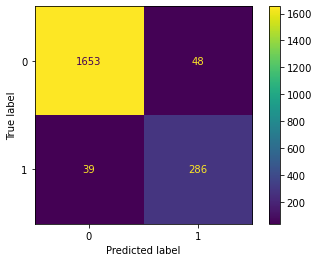

In [38]:
tn_rf2, fp_rf2, fn_rf2, tp_rf2 = confusion_matrix(y_test,rf_tn2_pred,labels=[1,0]).ravel()
plot_confusion_matrix(rf_tuned2,x_test,y_test)

In [39]:
pre_rf2, rec_rf2, thr_rf2 = precision_recall_curve(y_test, rf_tn2_prob[:,1])
rf2_tn_auc = auc(rec_rf2, pre_rf2)
rf2_tn_auc

0.9433960441740259

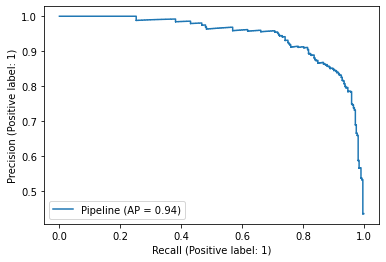

In [40]:
plot_precision_recall_curve(rf_tuned2,x_test,y_test)

In [41]:
model_rf_tn_cv = cross_val_score(rf_tuned2, x_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
print("Random Forest (SMOTE)CV")
print('CV Score:', model_rf_tn_cv)
print('CV Score Mean:', model_rf_tn_cv.mean())
print('CV Score Std:', model_rf_tn_cv.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


Random Forest (SMOTE)CV
CV Score: [0.87356322 0.90769231 0.89230769 0.87307692 0.8697318 ]
CV Score Mean: 0.8832743884468023
CV Score Std: 0.014557006311973101


## Model Compare

In [51]:
rf_comparison = pd.DataFrame({
    "Random FOrest Default":[accuracy_score(y_test,rf_pred),precision_score(y_test,rf_pred),recall_score(y_test,rf_pred),auc_rf,f1_score(y_test,rf_pred),
                tp_rf,tn_rf,fp_rf,fn_rf],
    "Random Forest SMOTE":[accuracy_score(y_test,rf_sm_pred),precision_score(y_test,rf_sm_pred),recall_score(y_test,rf_sm_pred),rf_sm_auc,f1_score(y_test,rf_sm_pred),
                tp_rf_sm,tn_rf_sm,fp_rf_sm,fn_rf_sm],
    "Random Forest Tuned":[accuracy_score(y_test,rf_tn2_pred),precision_score(y_test,rf_tn2_pred),recall_score(y_test,rf_tn2_pred),rf2_tn_auc,f1_score(y_test,rf_tn2_pred),
                tp_rf2,tn_rf2,fp_rf2,fn_rf2]
},index = ['Acuracy Score','precision Score','recall score','AUC','f1 score','TP','TN','FP','FN'])
rf_comparison

,Random FOrest Default,Random Forest SMOTE,Random Forest Tuned
Acuracy Score,0.959526,0.959526,0.957058
precision Score,0.880878,0.880878,0.856287
recall score,0.864615,0.864615,0.880000
AUC,0.948309,0.948309,0.943396
f1 score,0.872671,0.872671,0.867982
TP,281.000000,1663.000000,1653.000000
TN,1663.000000,281.000000,286.000000
FP,38.000000,44.000000,39.000000
FN,44.000000,38.000000,48.000000


<h1> Chosen Model

dari ke-4 model yang sudah di coba Random forest memiliki precision_recall_curve yang paling baik di bandingkan model yang lain sehingga kita akan fokus pada RandomForesst

In [52]:
rf_comparison

,Random FOrest Default,Random Forest SMOTE,Random Forest Tuned
Acuracy Score,0.959526,0.959526,0.957058
precision Score,0.880878,0.880878,0.856287
recall score,0.864615,0.864615,0.880000
AUC,0.948309,0.948309,0.943396
f1 score,0.872671,0.872671,0.867982
TP,281.000000,1663.000000,1653.000000
TN,1663.000000,281.000000,286.000000
FP,38.000000,44.000000,39.000000
FN,44.000000,38.000000,48.000000


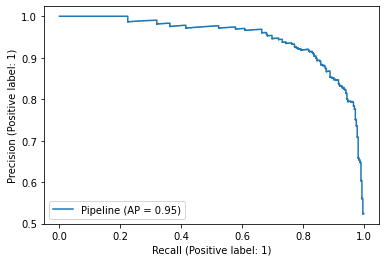

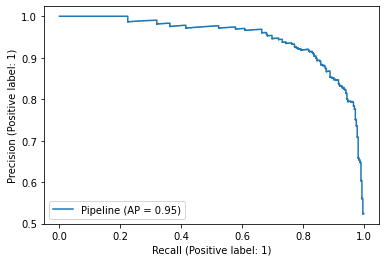

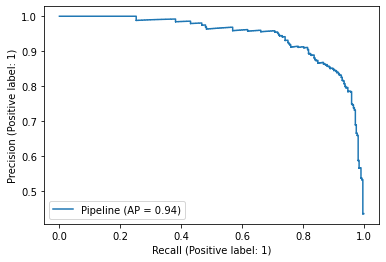

In [53]:
plot_precision_recall_curve(all_pipe_rf,x_test,y_test)
plot_precision_recall_curve(all_pipe_rf_sm,x_test,y_test)
plot_precision_recall_curve(rf_tuned2,x_test,y_test)

dari hasil compare di atas nilai Precision_recall curve paling tinngi ada pada model default tanpa smote dan dengan smote yaitu 0.95<br>
pada model tuned nilai precision_recall_curve berbeda sedikit tetapi memiliki nialiaccuracy dan recall yang lebih tinggi di bandingkan model tanpa di tunning

In [56]:
disp = pd.DataFrame({
    "Random FOrest Default":[accuracy_score(y_test,rf_pred),precision_score(y_test,rf_pred),recall_score(y_test,rf_pred)],
    "Random Forest SMOTE":[accuracy_score(y_test,rf_sm_pred),precision_score(y_test,rf_sm_pred),recall_score(y_test,rf_sm_pred)],
    "Random Forest Tuned":[accuracy_score(y_test,rf_tn2_pred),precision_score(y_test,rf_tn2_pred),recall_score(y_test,rf_tn2_pred)]
},index = ['Acuracy Score','precision Score','recall score'])
disp

,Random FOrest Default,Random Forest SMOTE,Random Forest Tuned
Acuracy Score,0.959526,0.959526,0.957058
precision Score,0.880878,0.880878,0.856287
recall score,0.864615,0.864615,0.880000


sehinga pada deployment kita akan mengguanakn RandomForest dengan hyperparameter tunning untuk di lakukan deployment untuk melakukan pedit data baru pada flask yang telah di buat

In [ ]:

# X_train2 = pd.DataFrame(rf_transformer.fit_transform(x_train))
# x_test2 = pd.DataFrame(rf_transformer.transform(x_test))

# depths = range(1,50)
# testing_accuracies = []
# training_accuracies = []
# score = 0
# smote = SMOTE()
# X_smo, y_smo = smote.fit_resample(X_train2, y_train)

# for i in depths:
#     dtc_i = RandomForestClassifier(bootstrap=True, criterion='gini',min_samples_split=5, n_estimators=200,max_depth=i)
   
#     dtc_i.fit(X_smo, y_smo)
    
#     y_pred_train = dtc_i.predict(X_smo)
#     training_accuracies.append(accuracy_score(y_smo, y_pred_train))
    
#     y_pred_test = dtc_i.predict(x_test2)
#     acc_score = accuracy_score(y_test, y_pred_test)
#     testing_accuracies.append(acc_score)
    
#     if score < acc_score:
#         score = acc_score
#         best_depth = i

In [ ]:
# plt.figure(figsize=(10,7))
# sns.lineplot(depths, testing_accuracies)
# sns.lineplot(depths, training_accuracies)
# plt.axvline(best_depth, color='red')
# plt.legend(['testing accuracy', 'training accuracy', best_depth])
# plt.show()

# Deployment

In [ ]:
import pickle
import joblib

In [ ]:
rf_tuned2.fit(x,y)

In [ ]:
filename = 'rf_tuned.sav'
pickle.dump(dtc_tuned, open(filename, 'wb'))

In [ ]:
filename = 'rf_tuned.sav'
loaded_model = pickle.load((open(filename, 'rb')))

In [ ]:
loaded_model